# Import library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

# Load data and visualize

In [2]:
all_data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [3]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [4]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/no

'1 no.jpeg'  '26 no.jpg'  '41 no.jpg'	 N15.jpg    No16.jpg	 'no 89.jpg'
'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg    No17.jpg	 'no 9.png'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg    No18.jpg	 'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG    No19.jpg	 'no 91.jpeg'
'13 no.jpg'  '3 no.jpg'   '45 no.jpg'	 N2.JPG     No20.jpg	 'no 92.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG    No21.jpg	 'no 923.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg    No22.jpg	 'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG   'no 1.jpg'	 'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG   'no 10.jpg'	 'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '5 no.jpg'	 N3.jpg    'no 100.jpg'  'no 97.jpg'
'2 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N5.jpg    'no 2.jpg'	 'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '6 no.jpg'	 N6.jpg    'no 3.jpg'	 'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '7 no.jpg'	 No11.jpg  'no 4.jpg'	  no.jpg
'22 no.jpg'  '38 no.jpg'  '8 no.jpg'	 No12.jpg  'no 5.jpeg'
'2

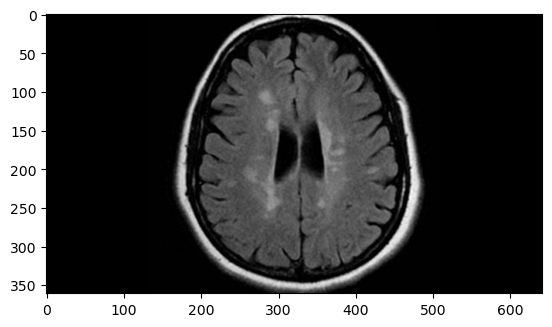

In [5]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 8.jpg")
plt.imshow(img)

In [6]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [7]:
img.shape

(361, 642, 3)

In [8]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (183, 275, 3)


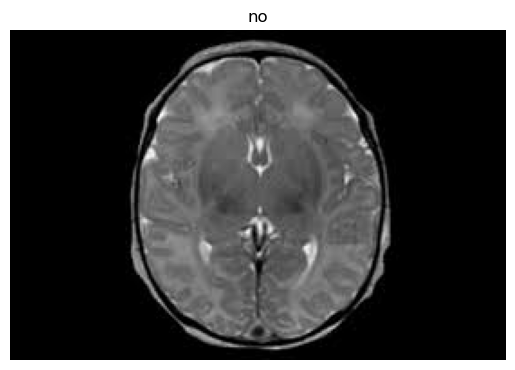

In [9]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="no")

Image shape: (325, 300)


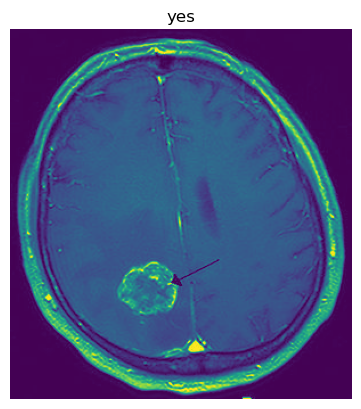

In [10]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="yes")

# Data preprocess

In [11]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [12]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [13]:
test_data

# CNN

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [16]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 18s 1s/step - loss: 0.8383 - accuracy: 0.6957 - val_loss: 0.5350 - val_accuracy: 0.7668
Epoch 2/50
8/8 [==============================] - 7s 900ms/step - loss: 0.5740 - accuracy: 0.7154 - val_loss: 0.5668 - val_accuracy: 0.6759
Epoch 3/50
8/8 [==============================] - 7s 897ms/step - loss: 0.5524 - accuracy: 0.7708 - val_loss: 0.5609 - val_accuracy: 0.7154
Epoch 4/50
8/8 [==============================] - 7s 894ms/step - loss: 0.5349 - accuracy: 0.7510 - val_loss: 0.4951 - val_accuracy: 0.7589
Epoch 5/50
8/8 [==============================] - 7s 894ms/step - loss: 0.4876 - accuracy: 0.7589 - val_loss: 0.4781 - val_accuracy: 0.7905
Epoch 6/50
8/8 [==============================] - 7s 959ms/step - loss: 0.4682 - accuracy: 0.7945 - val_loss: 0.4621 - val_accuracy: 0.7787
Epoch 7/50
8/8 [==============================] - 7s 928ms/step - loss: 0.4511 - accuracy: 0.8063 - val_loss: 0.4441 - val_accuracy: 0.8142
Epoch 8/50
8/8 [======

In [17]:
model.evaluate(test_data)

8/8 [==============================] - 3s 427ms/step - loss: 0.0692 - accuracy: 0.9763


[0.06920091062784195, 0.9762845635414124]

<AxesSubplot:>

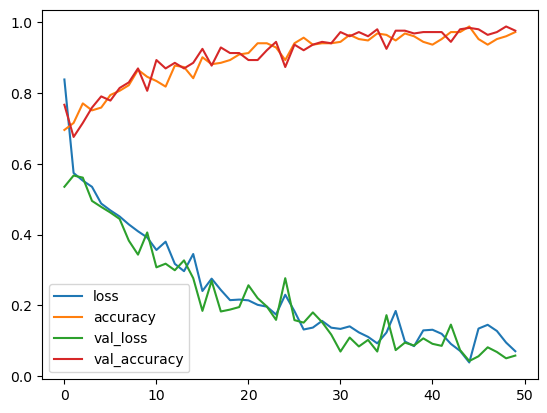

In [18]:
pd.DataFrame(model_history.history).plot()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    